# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

In [4]:

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [5]:
city_name = 'kirksville'
response = requests.get(query_url + city_name).json()
print(response)

{'coord': {'lon': -92.58, 'lat': 40.19}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 6.24, 'feels_like': 3.75, 'temp_min': 6, 'temp_max': 7, 'pressure': 1022, 'humidity': 81}, 'visibility': 16093, 'wind': {'speed': 1.47, 'deg': 246}, 'clouds': {'all': 90}, 'dt': 1584394849, 'sys': {'type': 1, 'id': 4545, 'country': 'US', 'sunrise': 1584361164, 'sunset': 1584404294}, 'timezone': -18000, 'id': 5055787, 'name': 'Kirksville', 'cod': 200}


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# set up lists to hold reponse info
city = []
lat = []
lon = []
temp = []
humidity = []
clouds = []
windspeed = []
temp_max = []


    # Loop through the list of cities and perform a request for data on each
for city_name in cities:
    try:
        response = requests.get(query_url + city_name).json()
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        temp_max.append(response['main']['temp_max'])
        city.append(city_name)
    except (KeyError, ValueError, IndexError):
        print("Data for one or more Keys is missing - skipping record...")


Data for one or more Keys is missing - skipping record...
Data for one or more Keys is missing - skipping record...
Data for one or more Keys is missing - skipping record...
Data for one or more Keys is missing - skipping record...
Data for one or more Keys is missing - skipping record...
Data for one or more Keys is missing - skipping record...
Data for one or more Keys is missing - skipping record...
Data for one or more Keys is missing - skipping record...
Data for one or more Keys is missing - skipping record...
Data for one or more Keys is missing - skipping record...
Data for one or more Keys is missing - skipping record...
Data for one or more Keys is missing - skipping record...
Data for one or more Keys is missing - skipping record...
Data for one or more Keys is missing - skipping record...
Data for one or more Keys is missing - skipping record...
Data for one or more Keys is missing - skipping record...
Data for one or more Keys is missing - skipping record...
Data for one o

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
weather_dict = {
    "city": city,
    "lat": lat,
    "lon": lon,
    "temp": temp,
    "humidity": humidity,
    "clouds": clouds,
    "windspeed": windspeed,
    "temp_max": temp_max
}
weather_data = pd.DataFrame(weather_dict)

# save dataframe to a csv file
weather_data.to_csv(output_data_file, index = False)


In [8]:
weather_data

,city,lat,lon,temp,humidity,clouds,windspeed,temp_max
0,vaitape,-16.52,-151.75,28.25,73,17,3.88,28.25
1,gat,31.61,34.76,14.00,93,0,1.50,16.67
2,maniitsoq,65.42,-52.90,-17.15,72,4,6.20,-17.15
3,kapaa,22.08,-159.32,21.85,94,90,11.80,23.00
4,atuona,-9.80,-139.03,27.85,68,14,4.02,27.85
...,...,...,...,...,...,...,...,...
557,magadan,59.57,150.80,-11.35,90,100,1.40,-11.35
558,tiznit,29.58,-9.50,11.15,84,94,2.63,11.15
559,susehri,40.16,38.09,-10.55,94,100,5.58,-10.55
560,huatusco,19.15,-96.95,23.95,45,4,2.29,23.95


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

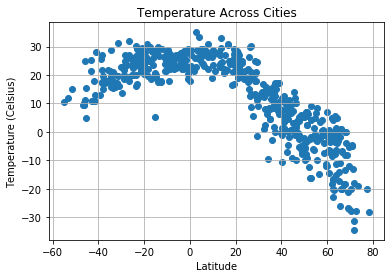

In [9]:
# Build a scatter plot for Latitiude vs Temperature
plt.scatter(weather_data["lat"], weather_data["temp"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature Across Cities")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/TemperatureAcrossCities.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

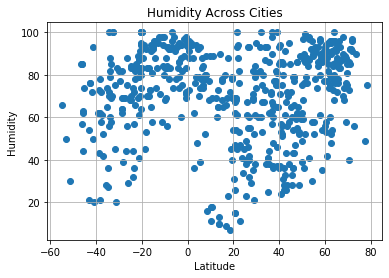

In [10]:
# Build a scatter plot for Latitiude vs Humidity
plt.scatter(weather_data["lat"], weather_data["humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity Across Cities")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/HumidityAcrossCities.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

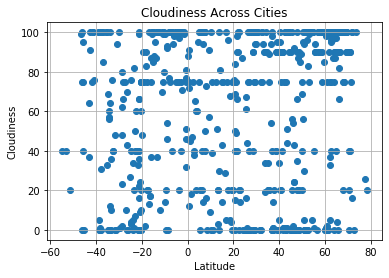

In [11]:
# Build a scatter plot for Latitiude vs Cloudiness
plt.scatter(weather_data["lat"], weather_data["clouds"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness Across Cities")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/CloudinessAcrossCities.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

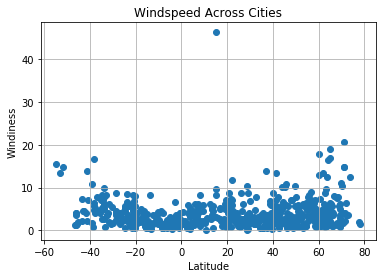

In [12]:
# Build a scatter plot for Latitiude vs Windspeed
plt.scatter(weather_data["lat"], weather_data["windspeed"], marker="o")

# Incorporate the other graph properties
plt.title("Windspeed Across Cities")
plt.ylabel("Windiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/WindinessAcrossCities.png")

# Show plot
plt.show()

## Linear Regression

Linear Regression: Latitude vs. Temperature
--------------------------------------------------
y = -0.31x +18.15
The r-squared is: -0.7576585550107255


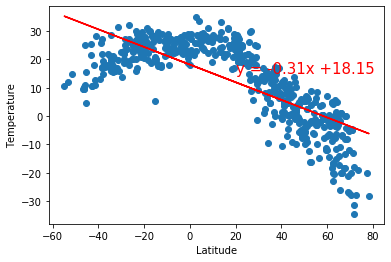

Linear Regression: Latitude vs. Humidity
--------------------------------------------------
y = 0.02x +70.31
The r-squared is: 0.03867981397076846


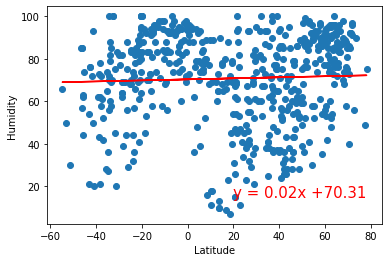

Linear Regression: Latitude vs. Cloudiness
--------------------------------------------------
y = 0.12x +55.07
The r-squared is: 0.10946434022588966


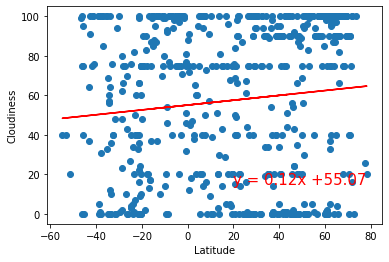

Linear Regression: Latitude vs. Windiness
--------------------------------------------------
y = 0.01x +3.83
The r-squared is: 0.06892019149560288


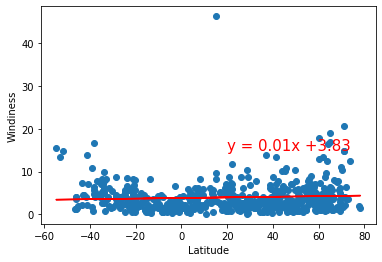

In [28]:
# OPTIONAL: Create a function to create Linear Regression plots

y_dimen = ["temp", "humidity", "clouds", "windspeed"]
x_values = weather_data["lat"]

y_values = weather_data["temp"],

for y_values in y_dimen:
    
    # Perform a linear regression on temperature vs. latitude
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, weather_data[y_values])

    # Get regression values
    regress_values = x_values * slope + intercept
    #print(regress_values)

    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    

    # Create Plot
    plt.scatter(x_values,weather_data[y_values])
    plt.plot(x_values,regress_values,"r-")

    # Label plot and annotate the line equation
    plt.xlabel('Latitude')
    
    if y_values == "temp":
        plt.ylabel('Temperature')
        regress_title = "Linear Regression: Latitude vs. Temperature"
        
    elif y_values == "humidity":
        plt.ylabel('Humidity')
        regress_title = "Linear Regression: Latitude vs. Humidity"
        
    elif y_values == "clouds":
        plt.ylabel('Cloudiness')
        regress_title = "Linear Regression: Latitude vs. Cloudiness"
        
    elif y_values == "windspeed":
        plt.ylabel('Windiness')
        regress_title = "Linear Regression: Latitude vs. Windiness"
        
    plt.annotate(line_eq,(20,15),fontsize=15,color="red")

    # Print r square value
    print(regress_title)
    print("--"* 25)
    print(line_eq)
    print(f"The r-squared is: {rvalue}")
    
    # Show plot
    plt.show()

In [14]:
# Create Northern and Southern Hemisphere DataFrames

weather_data["Hemisphere"] = ""
for i in range(len(weather_data)):
    if weather_data["lat"][i] > 0:
        weather_data["Hemisphere"][i] = "Northern"
    elif weather_data["lat"][i] < 0:
        weather_data["Hemisphere"][i] = "Southern"
    else:
        weather_data["Hemisphere"][i] = "Equator"

northern_df = pd.DataFrame(weather_data.loc[weather_data["Hemisphere"] == "Northern",])
southern_df = pd.DataFrame(weather_data.loc[weather_data["Hemisphere"] == "Southern",])


C:\Users\busha\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\busha\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

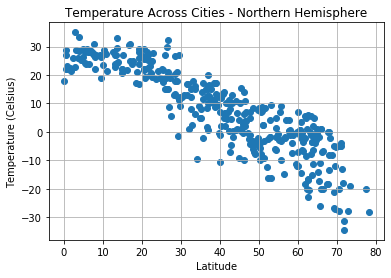

In [15]:
# Build a scatter plot for each Latitude and Max Temp (Northern Hemisphere)
plt.scatter(northern_df["lat"], northern_df["temp_max"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature Across Cities - Northern Hemisphere")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/NorthernTemperatureAcrossCities.png")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

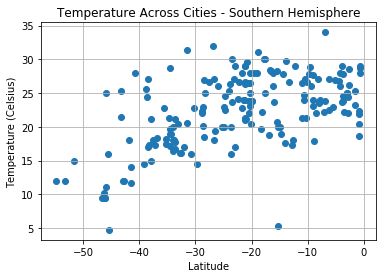

In [16]:
# Build a scatter plot for each Latitude and Max Temp  (Southern Hemisphere)
plt.scatter(southern_df["lat"], southern_df["temp_max"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature Across Cities - Southern Hemisphere")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/SouthernTemperatureAcrossCities.png")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

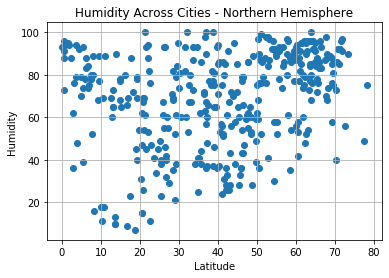

In [17]:
# Build a scatter plot for Latitude and Humidity (Northern Hemisphere)
plt.scatter(northern_df["lat"], northern_df["humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity Across Cities - Northern Hemisphere")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/NorthernHumidityAcrossCities.png")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

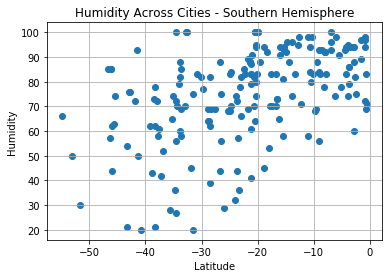

In [18]:
# Build a scatter plot for Latitude and Humidity (Southern Hemisphere)
plt.scatter(southern_df["lat"], southern_df["humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity Across Cities - Southern Hemisphere")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/SouthernHumidityAcrossCities.png")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

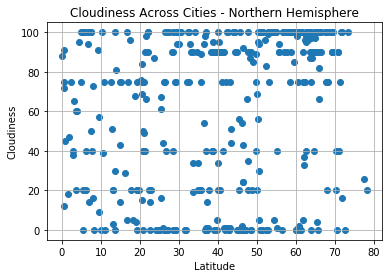

In [19]:
# Build a scatter plot for Latitude and Cloudiness (Northern Hemisphere)
plt.scatter(northern_df["lat"], northern_df["clouds"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness Across Cities - Northern Hemisphere")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/NorthernCloudinessAcrossCities.png")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

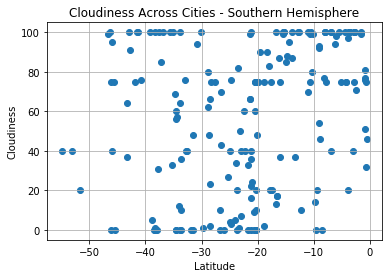

In [20]:
# Build a scatter plot for Latitude and Cloudiness (Southern Hemisphere)
plt.scatter(southern_df["lat"], southern_df["clouds"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness Across Cities - Southern Hemisphere")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/SouthernCloudinessAcrossCities.png")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

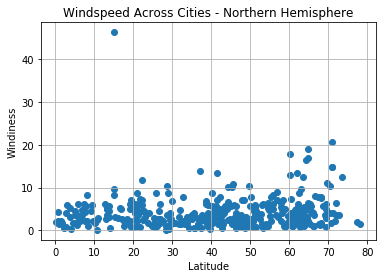

In [21]:
# Build a scatter plot for Latitude and Windspeed (Northern Hemisphere)
plt.scatter(northern_df["lat"], northern_df["windspeed"], marker="o")

# Incorporate the other graph properties
plt.title("Windspeed Across Cities - Northern Hemisphere")
plt.ylabel("Windiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/WindinessAcrossCities.png")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

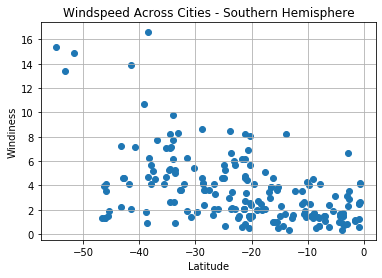

In [22]:
# Build a scatter plot for Latitude and Windspeed (Southern Hemisphere)
plt.scatter(southern_df["lat"], southern_df["windspeed"], marker="o")

# Incorporate the other graph properties
plt.title("Windspeed Across Cities - Southern Hemisphere")
plt.ylabel("Windiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/WindinessAcrossCities.png")

# Show plot
plt.show()